In [ ]:
# cargue de librerias 
import pandas as pd 
import matplotlib.pyplot as plt


In [29]:
# Cargar los datos de los archivos "productos.csv" y "ventas.csv" en dataframes de pandas.
df_productos = pd.read_csv(r'..\Data\raw\productos.csv')
df_ventas = pd.read_csv(r'..\Data\raw\ventas.csv')

## Análisis exploratorio inicial

Realizar un análisis inicial de los dataframes para entender su estructura, tipos de datos y valores faltantes. Esto incluye mostrar las primeras filas, información general y estadísticas descriptivas.

In [34]:
# mostrar las primeras 5 filas  de cada DataFrame con el objetivo de visualizar el cargue exito de datos
print('-------------DataFrame de productos--------------------------')
display(df_productos.head())
print('\n-------------DataFrame de ventas--------------------------')
display(df_ventas.head())

-------------DataFrame de productos--------------------------


,codigo_barras,descripcion,marca,proveedor,contenido
0,7730197008076,"AGUA SABORIZADA AQUARIUS MANZANA 1,5L",AQUARIUS,MONTEVIDEO REFRESCOS S.R.L.,1500
1,7730197008597,"AGUA SABORIZADA AQUARIUS NARANJA 1,5L",AQUARIUS,MONTEVIDEO REFRESCOS S.R.L.,1500
2,7730197008006,"AGUA SABORIZADA AQUARIUS PERA 1,5L",AQUARIUS,MONTEVIDEO REFRESCOS S.R.L.,1500
3,7734284001913,"AGUA SABORIZADA H2OH! CITRUS 1,5L",H2OH!,FNC S.A.,1500
4,7734284001185,"AGUA SABORIZADA H2OH! LIMA LIMON 1,5L",H2OH!,FNC S.A.,1500



-------------DataFrame de ventas--------------------------


,fecha_comercial,pdv_codigo,codigo_barras,imp_vta,cant_vta
0,2020-06-02,514,7730400001518,69.0,1
1,2020-06-17,8155,7734284001157,70.0,1
2,2020-06-11,7604,7730400003002,77.0,1
3,2020-06-02,3207,7734284001913,70.0,1
4,2020-06-07,8008,7730400001835,84.0,1


In [35]:
# Analizar información basica del DataFrame productos
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   codigo_barras  22 non-null     int64 
 1   descripcion    22 non-null     object
 2   marca          22 non-null     object
 3   proveedor      22 non-null     object
 4   contenido      22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1012.0+ bytes


In [36]:
# Analizar información basica del DataFrame ventas
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242246 entries, 0 to 242245
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fecha_comercial  242246 non-null  object 
 1   pdv_codigo       242246 non-null  int64  
 2   codigo_barras    242246 non-null  int64  
 3   imp_vta          242246 non-null  float64
 4   cant_vta         242246 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 9.2+ MB


Considerando  los tipos de  datos  en cada uno de los DataFrame,  se identifica que en ventas se debe de modificar el Dtype del campo Fecha_comercial,  debido a que es indispensable   realizar el cambio de string afechas. 

In [37]:
df_productos.describe()

,codigo_barras,contenido
count,2.200000e+01,22.000000
mean,7.731079e+12,1636.363636
std,1.548231e+09,453.342564
min,7.730197e+12,0.000000
25%,7.730400e+12,1500.000000
50%,7.730400e+12,1650.000000
75%,7.730400e+12,1650.000000
max,7.734284e+12,2250.000000


Se  genera una alerta  en la variable contenido  perteneciente al dataframe productos,  ya que se observa  proudctos con contenido igual a  cero (0)

In [38]:
df_ventas.describe()

,pdv_codigo,codigo_barras,imp_vta,cant_vta
count,242246.000000,2.422460e+05,242246.000000,242246.000000
mean,4377.878545,7.730888e+12,123.727381,1.482770
std,3249.116751,1.317051e+09,83.693651,1.031854
min,3.000000,7.730197e+12,14.700000,1.000000
25%,627.000000,7.730400e+12,79.000000,1.000000
50%,4914.000000,7.730400e+12,93.000000,1.000000
75%,7513.000000,7.730400e+12,150.000000,2.000000
max,9710.000000,7.734284e+12,4607.993000,72.000000


Se sugiere  analizar  posibles  datos  atipicos  o de palanqueo  sobre el campo imp_vta, debido a  que  presenta una aparente  variabilidad distribucional alta.

## Identificar y manejar valores faltantes

Analizar la cantidad y distribución de valores faltantes en cada columna y decidir la estrategia para manejarlos (eliminación, imputación, etc.). segun el caso de pertinencia

In [39]:
print("Missing values in df_productos:")
print(df_productos.isnull().sum())
print("\nMissing values in df_ventas:")
print(df_ventas.isnull().sum())

Missing values in df_productos:
codigo_barras    0
descripcion      0
marca            0
proveedor        0
contenido        0
dtype: int64

Missing values in df_ventas:
fecha_comercial    0
pdv_codigo         0
codigo_barras      0
imp_vta            0
cant_vta           0
dtype: int64


A partir del resultado anterior, no se evidencia  valores faltantes dentro de los conjuntos de datos porporcionados.

## Identificar y manejar duplicados

Verificar si hay filas duplicadas en los dataframes y eliminarlas si es necesario.

In [40]:
duplicates_productos = df_productos.duplicated().sum()
print(f"Number of duplicate rows in df_productos: {duplicates_productos}")

duplicates_ventas = df_ventas.duplicated().sum()
print(f"Number of duplicate rows in df_ventas: {duplicates_ventas}")

Number of duplicate rows in df_productos: 0
Number of duplicate rows in df_ventas: 0


No se evidencia datos duplicados 

## Analizar la calidad de los datos

Identificar posibles inconsistencias o errores en los datos (por ejemplo, formatos incorrectos, valores atípicos).

In [43]:
# Examine 'contenido' in df_productos for non-numeric or unrealistic values
print("Value counts for 'contenido' in df_productos:")
print(df_productos['contenido'].value_counts())

# Examine 'fecha_comercial' in df_ventas for date format consistency
print("\nData type of 'fecha_comercial' in df_ventas:")
print(df_ventas['fecha_comercial'].dtype)
# Attempt to convert to datetime to check for format issues
try:
    pd.to_datetime(df_ventas['fecha_comercial'])
    print("'fecha_comercial' can be converted to datetime format.")
except Exception as e:
    print(f"Error converting 'fecha_comercial' to datetime: {e}")

# Check for negative values in 'imp_vta' and 'cant_vta'
negative_imp_vta = df_ventas[df_ventas['imp_vta'] < 0].shape[0]
negative_cant_vta = df_ventas[df_ventas['cant_vta'] < 0].shape[0]
print(f"\nNumber of negative 'imp_vta' values: {negative_imp_vta}")
print(f"Number of negative 'cant_vta' values: {negative_cant_vta}")

# Check for zero 'contenido' in df_productos, as it seems unrealistic
zero_contenido = df_productos[df_productos['contenido'] == 0].shape[0]
print(f"\nNumber of zero 'contenido' values in df_productos: {zero_contenido}")
display(df_productos[df_productos['contenido'] == 0])

Value counts for 'contenido' in df_productos:
contenido
1650    10
1500     7
2250     4
0        1
Name: count, dtype: int64

Data type of 'fecha_comercial' in df_ventas:
object
'fecha_comercial' can be converted to datetime format.

Number of negative 'imp_vta' values: 0
Number of negative 'cant_vta' values: 0

Number of zero 'contenido' values in df_productos: 1


,codigo_barras,descripcion,marca,proveedor,contenido
16,7730400003556,"AGUA SABORIZADA SALUS FRUTTE POMELO 2,25L",SALUS FRUTTE,COMPAÑIA SALUS SA,0


Se identifica que los valores relevantes  asociados  a los importes de ventas y la cantiad de unidades vendidas no presentan valores negativos que puedan impactar en eñ conjunto de datos como inconsistentes. Por otro lado, se identifica que el producto  de codigo_barras  **7730400003556**  con descripción  **AGUA SABORIZADA SALUS FRUTTE POMELO 2,25L**  expresa que tiene un contenido de mililitros de producto de cero,  identificando un posible valor  anomalo. Finalmente, se sugiere  realizar un proceso de limpieza de formato de datos  al campo fecha_comercial. ya que con metodos basicos no se fue posible  realizar el casteo de formato.

## Realizar análisis exploratorio adicional

Profundizar en el análisis de los datos, incluyendo visualizaciones, para identificar patrones, relaciones y posibles hallazgos relevantes.


Convierte la columna 'fecha_comercial' a fecha y hora, extrae el día de la semana y el mes y analiza las tendencias de ventas a lo largo del tiempo.

In [44]:
df_ventas['fecha_comercial'] = pd.to_datetime(df_ventas['fecha_comercial'])
df_ventas['day_of_week'] = df_ventas['fecha_comercial'].dt.day_name()
df_ventas['month'] = df_ventas['fecha_comercial'].dt.month_name()

sales_over_time = df_ventas.groupby('fecha_comercial')[['imp_vta', 'cant_vta']].sum()
sales_over_time

,imp_vta,cant_vta
fecha_comercial,,
2020-06-01,64587.3258,815
2020-06-02,66087.5286,842
2020-06-03,64913.6147,824
2020-06-04,73499.6485,929
2020-06-05,81430.1154,1032
...,...,...
2020-11-26,220068.1486,2562
2020-11-27,293326.5831,3420
2020-11-28,329754.1564,3847


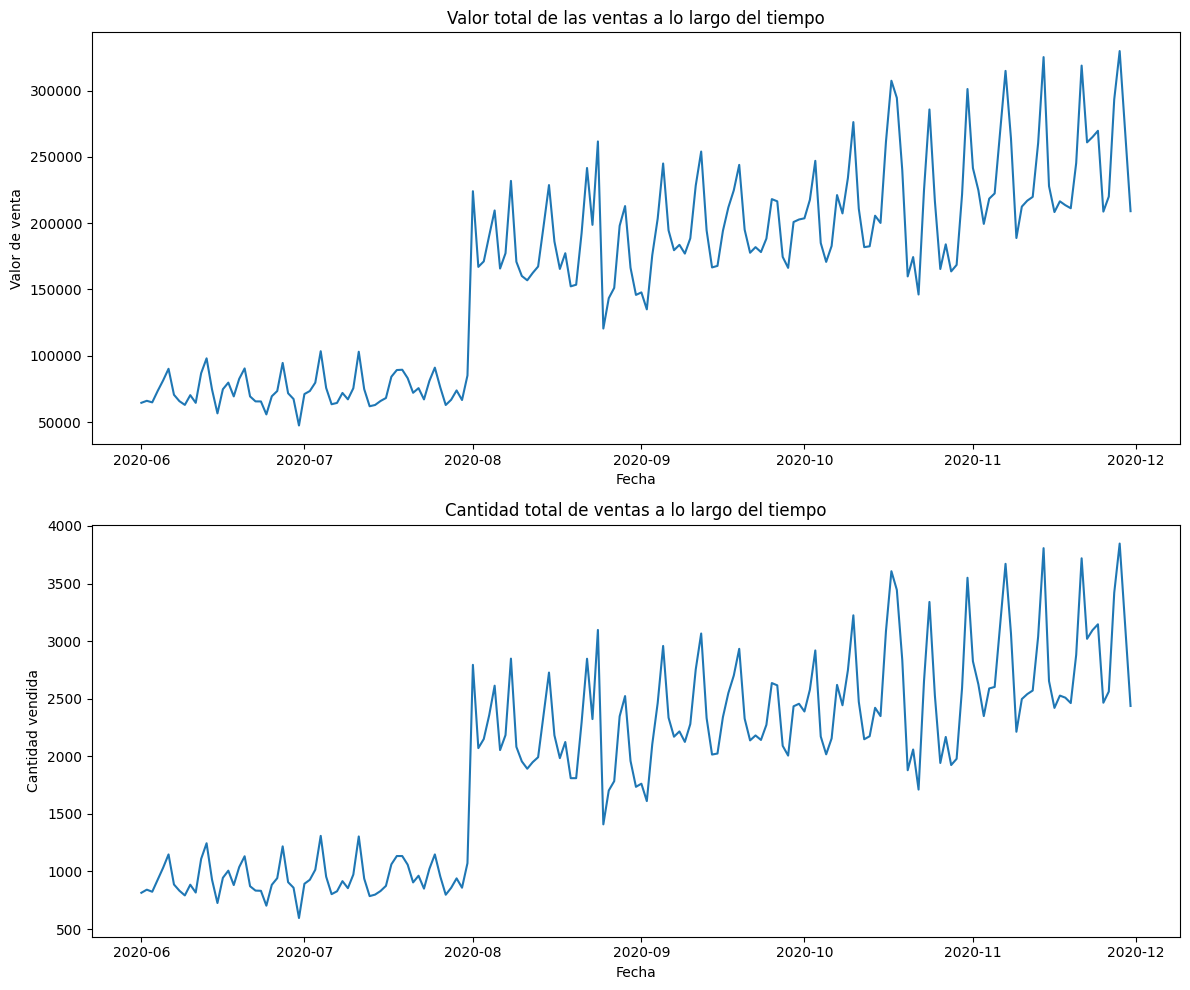

In [ ]:
# Grafico de serie temporal de ventas  registradas  sobre el periodo de analisis general
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].plot(sales_over_time.index, sales_over_time['imp_vta'])
axes[0].set_title('Valor total de las ventas a lo largo del tiempo')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor de venta')

axes[1].plot(sales_over_time.index, sales_over_time['cant_vta'])
axes[1].set_title('Cantidad total de ventas a lo largo del tiempo')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Cantidad vendida')

plt.tight_layout()
plt.show()

Analizando las  series temporales  asociadas al importe de venta total y la cantidad de unidades vendidas  entre el periodo de 2020-06 hasta 2020-12  se identifica los siguientes patrones generales:

1. Valor total de ventas (gráfica superior)

- Tendencia inicial (junio–julio 2020):
  Comportamiento relativamente estable con ligeras fluctuaciones semanales. El valor promedio parece estar entre 60,000 y 90,000.

- Cambio abrupto (principios de agosto):
  - Se observa un salto significativo a más de 200,000, lo cual indica un evento importante como:

    - Nueva campaña de marketing
    - Expansión de canales de distribución
    - Aumento de cobertura geográfica o de surtido

- Posterior al cambio (agosto–noviembre):
  - Se mantiene una alta volatilidad con patrones semanales bien marcados (picos regulares). Aunque hay    altibajos, hay una tendencia ascendente sostenida hacia noviembre.
  - Los picos superan los 300,000 hacia el final

2. Cantidad total de ventas (gráfica inferior)

- El comportamiento es muy similar al de la serie de valor:
  - Baja y estable al inicio
  - Gran incremento a principios de agosto
  - Volatilidad y tendencia creciente hasta diciembre

- Esto sugiere que el incremento en valor no fue solo por aumento de precios, sino también por aumento en volumen de ventas.

Finalmente, se puede  tomar la determinación de  implementar  un analisis estocastico de series temporales, el cual permitan identificar  tendencias, estacionalidad, posible ruido blanco en las series y unanalisisde estacionariedad. 

In [52]:
# Anlisis que permite identificar cantidad vendida e importe de venta  por cada proveedor y sus productos ofertados
sales_by_product = df_ventas.groupby('codigo_barras')[['imp_vta', 'cant_vta']].sum().reset_index()
sales_by_product = pd.merge(sales_by_product, df_productos, on='codigo_barras', how='left')
cols = ['proveedor','descripcion' ]
result_seles_by_product = sales_by_product.groupby(cols)[['imp_vta', 'cant_vta']].sum()
pd.options.display.float_format = '{:,.2f}'.format 
result_seles_by_product

imp_vta  \
proveedor                   descripcion                                                    
COMPAÑIA SALUS SA           AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L   2,465,289.17   
                            AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 1,65L 1,118,444.66   
                            AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 2,25L 2,236,745.62   
                            AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L  1,475,466.75   
                            AGUA SABORIZADA SALUS FRUTTE CERO POMELO 2,25L  1,280,826.87   
                            AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L      1,135,801.31   
                            AGUA SABORIZADA SALUS FRUTTE FRUTILLA 1,65L       705,645.74   
                            AGUA SABORIZADA SALUS FRUTTE MANZANA 1,65L        724,258.55   
                            AGUA SABORIZADA SALUS FRUTTE MANZANA 2,25L      1,923,274.26   
                            AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L     1,702,898.12   
                            AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L      2,597,995.21   
                            AGUA SABORIZADA SALUS FRUTTE NARANJA 2,25L      3,085,952.24   
                            AGUA SABORIZADA SALUS FRUTTE PERA 1,65L           539,421.31   
                            AGUA SABORIZADA SALUS FRUTTE POMELO 1,65L       1,615,920.32   
                            AGUA SABORIZADA SALUS FRUTTE POMELO 2,25L       1,891,227.46   
FNC S.A.                    AGUA SABORIZADA H2OH! CITRUS 1,5L                 592,165.92   
                            AGUA SABORIZADA H2OH! LIMA LIMON 1,5L             845,143.46   
                            AGUA SABORIZADA H2OH! LIMONETO 1,5L               954,230.93   
                            AGUA SABORIZADA H2OH! NARANCHELO 1,5L             948,604.17   
MONTEVIDEO REFRESCOS S.R.L. AGUA SABORIZADA AQUARIUS MANZANA 1,5L             618,353.95   
                            AGUA SABORIZADA AQUARIUS NARANJA 1,5L             814,418.05   
                            AGUA SABORIZADA AQUARIUS PERA 1,5L                700,379.05   

                                                                             cant_vta  
proveedor                   descripcion                                                
COMPAÑIA SALUS SA           AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L       31163  
                            AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 1,65L     13667  
                            AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 2,25L     22609  
                            AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L      17877  
                            AGUA SABORIZADA SALUS FRUTTE CERO POMELO 2,25L      12942  
                            AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L          13939  
                            AGUA SABORIZADA SALUS FRUTTE FRUTILLA 1,65L          8454  
                            AGUA SABORIZADA SALUS FRUTTE MANZANA 1,65L           8915  
                            AGUA SABORIZADA SALUS FRUTTE MANZANA 2,25L          19443  
                            AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L         20655  
                            AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L          31680  
                            AGUA SABORIZADA SALUS FRUTTE NARANJA 2,25L          31155  
                            AGUA SABORIZADA SALUS FRUTTE PERA 1,65L              7004  
                            AGUA SABORIZADA SALUS FRUTTE POMELO 1,65L           19627  
                            AGUA SABORIZADA SALUS FRUTTE POMELO 2,25L           19330  
FNC S.A.                    AGUA SABORIZADA H2OH! CITRUS 1,5L                    8463  
                            AGUA SABORIZADA H2OH! LIMA LIMON 1,5L               12063  
                            AGUA SABORIZADA H2OH! LIMONETO 1,5L                 13489  
                            AGUA SABORIZADA H2OH! NARANCHELO 1,5L               13540  
MONTEVIDEO REFRESCOS S.R

In [55]:
# idenentificación de  cantidad de ventas y valor de importe por cada punto de venta/distribución

sales_by_pos = df_ventas.groupby('pdv_codigo')[['imp_vta', 'cant_vta']].sum().reset_index()
sales_by_pos = sales_by_pos.sort_values(by='imp_vta', ascending=False)
sales_by_pos

,pdv_codigo,imp_vta,cant_vta
97,514,"334,713.90",4334
338,7411,"303,961.17",3830
57,295,"293,374.88",3514
43,210,"275,277.61",3427
64,317,"265,751.90",3395
...,...,...,...
433,8801,102.00,1
58,298,84.00,1
3,26,77.00,1
94,499,70.00,1


Se idenitfico que el punto de venta que presenta mayores registros de importe a la venta es el de id= 514  con un total de importe en el periodo de 334,713.90 y un total de 4334 unidades ,  sin discriminar  linea de producto.

Analizar la relación entre el valor de las ventas y la cantidad, explorar la distribución del contenido del producto y analizar las ventas por marca y proveedor.

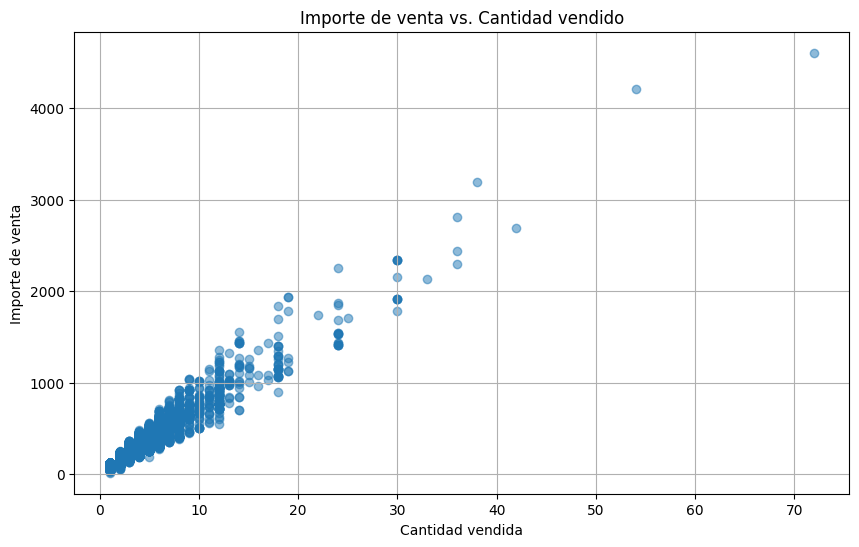

In [57]:
# grafico de disperción para  evaluar tendencia 
plt.figure(figsize=(10, 6))
plt.scatter(df_ventas['cant_vta'], df_ventas['imp_vta'], alpha=0.5)
plt.title('Importe de venta vs. Cantidad vendido')
plt.xlabel('Cantidad vendida')
plt.ylabel('Importe de venta')
plt.grid(True)
plt.show()

In [61]:
# calculo de correlación lineal
correlacion = df_ventas['cant_vta'].corr(df_ventas['imp_vta'])
print(f"Correlación entre cantidad y valor de venta: {correlacion:.4f}")


Correlación entre cantidad y valor de venta: 0.9587


Se observa una tendencia directamente proporcional entre el importe de venta  con referencia  a  la cantidad de produtos  vendidos  durante el periodo temporal de análisis

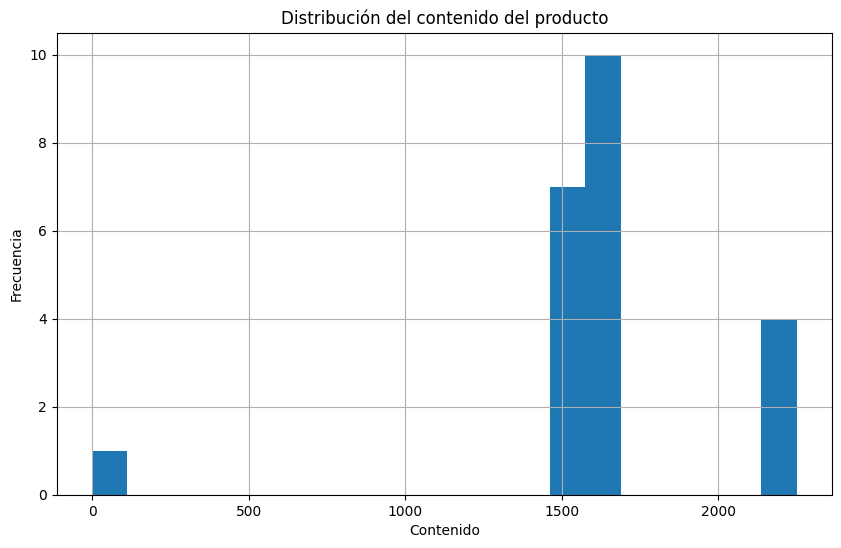

In [59]:
plt.figure(figsize=(10, 6))
df_productos['contenido'].hist(bins=20)
plt.title('Distribución del contenido del producto')
plt.xlabel('Contenido')
plt.ylabel('Frecuencia')
plt.show()

In [60]:
sales_by_brand = sales_by_product.groupby('marca')[['imp_vta', 'cant_vta']].sum().reset_index()
sales_by_supplier = sales_by_product.groupby('proveedor')[['imp_vta', 'cant_vta']].sum().reset_index()

display(sales_by_brand)
display(sales_by_supplier)

,marca,imp_vta,cant_vta
0,AQUARIUS,"2,133,151.06",33180
1,H2OH!,"3,340,144.47",47555
2,SALUS FRUTTE,"15,922,394.51",180202
3,SALUS FRUTTE CERO,"8,576,773.08",98258


,proveedor,imp_vta,cant_vta
0,COMPAÑIA SALUS SA,"24,499,167.58",278460
1,FNC S.A.,"3,340,144.47",47555
2,MONTEVIDEO REFRESCOS S.R.L.,"2,133,151.06",33180
